In [108]:
### generate data
import numpy as np

def generate_data(n_samples, true_coefficients=[0.1, 0.2, 0.5], noise_std=0.05):

    # Generate a random input signal
    x = np.random.randn(n_samples)

    # Generate the desired signal by passing the input through the known system
    y = np.zeros(n_samples)
    k = len(true_coefficients)
    for i in range(k, n_samples):
        if i < k:
            y[i] = np.dot(x[:i], true_coefficients[:i]) + np.random.randn() * noise_std
        else:
            y[i] = np.dot(x[i-k:i], true_coefficients) + np.random.randn() * noise_std
    return x, y

# Example usage
n_samples = 1000
true_coefficients = [0.1, 0.2, 0.3]
x, y = generate_data(n_samples, true_coefficients, noise_std=0.05)
print("Input signal:", x[:5])
print("Desired signal:", y[:5])

Input signal: [ 1.13225895 -1.36015841  0.23572117  0.37371706 -1.30354583]
Desired signal: [ 0.          0.          0.         -0.12810963 -0.04753713]


In [109]:
### LMS filter
k = len(true_coefficients)
def lms_filter(x,y, k, mu=0.01):

    ### initialize variables
    n_samples = len(x)
    w = np.zeros(k)
    y_hat = np.zeros(n_samples)
    e = np.zeros(n_samples)

    for i in range(k,n_samples):
        ## using schocastic gradient descent
        y_hat[i] = np.dot(x[i-k:i], w)
        e[i] = y[i] - y_hat[i]
        w = w + mu * e[i] * x[i-k:i]
        
        
    return y_hat, e,w

In [110]:
# Example usage
y_hat, e,w = lms_filter(x, y, k)
print("Estimated signal:", y_hat[:5])
print("Desired signal:", y[:5])
print("Error signal:", e[:5])
print("Estimated coefficients:", w)
print("True coefficients:", true_coefficients)

Estimated signal: [0.         0.         0.         0.         0.00227084]
Desired signal: [ 0.          0.          0.         -0.12810963 -0.04753713]
Error signal: [ 0.          0.          0.         -0.12810963 -0.04980797]
Estimated coefficients: [0.1054652  0.20858245 0.30013102]
True coefficients: [0.1, 0.2, 0.3]


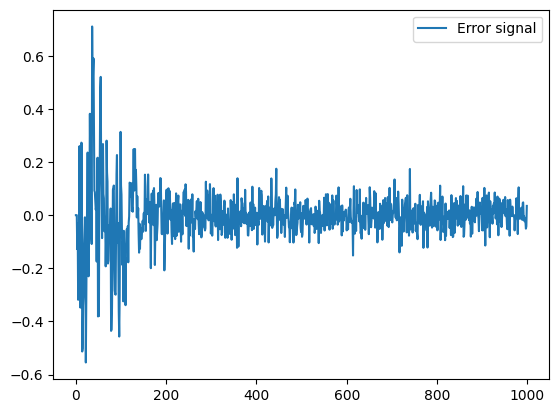

In [113]:
### Plot results
import matplotlib.pyplot as plt
plt.figure()
# plt.plot(y, label='Desired signal')
# plt.plot(y_hat, label='Estimated signal')
plt.plot(e, label='Error signal')
plt.legend()
plt.show()

In [114]:
### Plot results
